# Imports

In [1]:
from pathlib import Path

import numpy as np
import pyvista as pv
import matplotlib.pyplot as plt

from atomview.atom_wavefunction import get_atomic_wavefunction, get_wavefunction_prob_contour_mesh, get_wavefunction_volume_mesh
from atomview.utils import complex_to_rgba

In [2]:
pv.set_jupyter_backend('static')

fig_dir = Path(Path.cwd(), 'figures', 'gen_figs')
fig_dir.mkdir(exist_ok=True, parents=True)

# 2D Color Maps

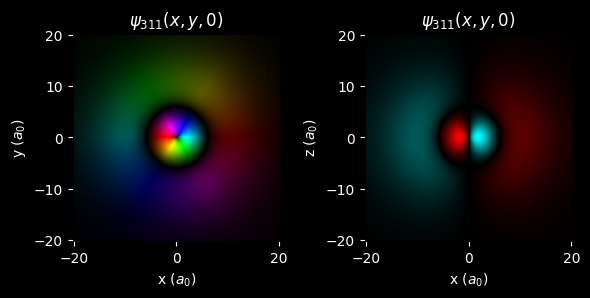

In [10]:
import matplotlib as mpl

COLOR = 'white'
mpl.rcParams['text.color'] = COLOR
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

(n, l, m) = (3, 1, 1)
span = (1.5 * n)**2
n_steps = 201

array_1d  = np.linspace(-span, +span, n_steps)

x, y = np.meshgrid(array_1d, array_1d, indexing='xy')
z = np.zeros_like(x)
psi_from_z = get_atomic_wavefunction(x, y, z, n, l, m)
color_map_from_z = complex_to_rgba(psi_from_z, mag_maps_to='v')

x, z = np.meshgrid(array_1d, array_1d, indexing='xy')
y = np.zeros_like(y)
psi_from_y = get_atomic_wavefunction(x, y, z, n, l, m)
color_map_from_y = complex_to_rgba(psi_from_y, mag_maps_to='v')

fig, (z_ax, y_ax) = plt.subplots(1, 2, figsize=(6, 6))



z_ax.imshow(color_map_from_z, origin='lower', extent=[-span, span, -span, span])
z_ax.set_xlabel('x ($a_0$)')
z_ax.set_ylabel('y ($a_0$)')
z_ax.set_title(f'$\psi_{{{n}{l}{m}}}(x, y, 0)$')

y_ax.imshow(color_map_from_y, origin='lower', extent=[-span, span, -span, span])
y_ax.set_xlabel('x ($a_0$)')
y_ax.set_ylabel('z ($a_0$)')
y_ax.set_title(f'$\psi_{{{n}{l}{m}}}(x, y, 0)$')

fig.set_tight_layout(True)
fig.set_facecolor('black')
fig.savefig(Path(fig_dir, '311_2D_slice.png'), facecolor='black')

plt.show()

In [ ]:
(n, l, m) = (3, 2, 0)

contour_mesh = get_wavefunction_prob_contour_mesh(n, l, m, num_pts=100, prob_threshold_list=(0.2, 0.5, 0.8), mag_maps_to='a')
volume_mesh = get_wavefunction_volume_mesh(n, l, m, num_pts=100, max_opacity=0.7)

grid_span = 10
grid_bounds = [-grid_span, grid_span, -grid_span, grid_span, -grid_span, grid_span]
cam_r = 100
cam_theta = 3 * np.pi / 8
cam_phi = 0
cam_x, cam_y, cam_z = cam_r * np.array([np.sin(cam_theta) * np.cos(cam_phi), np.sin(cam_theta) * np.cos(cam_phi), np.cos(cam_theta)])
camera_position = [cam_x, cam_y, cam_z]

pl = pv.Plotter(shape=(1, 2), notebook=True, border=False)
pl.subplot(0, 0)
pl.add_mesh(
    contour_mesh, 
    scalars='rgba', 
    rgb=True,   
    smooth_shading=True,        
    specular=0,
    diffuse=1,
    ambient=0.3
)
pl.camera.position = camera_position
pl.show_grid(bounds=grid_bounds)

pl.subplot(0, 1)
pl.add_volume(
    volume_mesh, 
    scalars='rgba', 
    mapper='gpu',
    specular=0,
    diffuse=1,
    ambient=0.3
)
pl.camera.position = camera_position
pl.show_grid(bounds=grid_bounds)

pl.show(screenshot=Path(fig_dir, '320_multi_contour_and_volume.png'),)

In [ ]:
(n, l, m) = (3, 1, 1)

contour_mesh_full = get_wavefunction_prob_contour_mesh(n, l, m, num_pts=100, prob_threshold_list=(0.5,), mag_maps_to='', clip=False)
contour_mesh_clipped, contour_mesh_clipped_ghost = get_wavefunction_prob_contour_mesh(n, l, m, num_pts=100, prob_threshold_list=(0.5,), 
                                                                                      mag_maps_to='', clip=True, clip_ghost=True,
                                                                                      ghost_opacity=0.5)

grid_span = 12
grid_bounds = [-grid_span, grid_span, -grid_span, grid_span, -grid_span, grid_span]
cam_r = 80
cam_theta = np.pi / 6
cam_phi = 0
cam_x, cam_y, cam_z = cam_r * np.array([np.sin(cam_theta) * np.cos(cam_phi), np.sin(cam_theta) * np.cos(cam_phi), np.cos(cam_theta)])
camera_position = [cam_x, cam_y, cam_z]

pl = pv.Plotter(shape=(1, 3), notebook=True, border=False, window_size=(800*3, 800))

pl.subplot(0, 0)
pl.add_mesh(
    contour_mesh_full, 
    scalars='rgba', 
    rgb=True,   
    smooth_shading=True,        
    specular=1,
    diffuse=1,
    ambient=0.3
)
pl.camera.position = camera_position
pl.show_grid(bounds=grid_bounds)


pl.subplot(0, 1)
pl.add_mesh(
    contour_mesh_clipped, 
    scalars='rgba', 
    rgb=True,   
    smooth_shading=True,        
    specular=1,
    diffuse=1,
    ambient=0.3
)
pl.camera.position = camera_position
pl.show_grid(bounds=grid_bounds)


pl.subplot(0, 2)
pl.add_mesh(
    contour_mesh_clipped, 
    scalars='rgba', 
    rgb=True,   
    smooth_shading=True,        
    specular=1,
    diffuse=1,
    ambient=0.3
)
pl.add_mesh(
    contour_mesh_clipped_ghost, 
    scalars='rgba', 
    rgb=True,   
    smooth_shading=True,        
    specular=1,
    diffuse=1,
    ambient=0.3
)
pl.camera.position = camera_position
pl.show_grid(bounds=grid_bounds)

pl.show(screenshot=Path(fig_dir, '311_contour_options.png'),)